In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#model_path = '/content/drive/My Drive/trainingFine.h5'  # Sesuaikan dengan path kamu
model_path = '/content/drive/My Drive/training_efb52507.h5'  # Sesuaikan dengan path kamu


# Memuat model
model = tf.keras.models.load_model(model_path)
classes = ['flower', 'plastik', 'wood']

1/1 [==============================] - 1s 1s/step
The predicted class is: plastik
Confidence: 0.90

Prediction Probabilities:
flower: 2.41%
plastik: 90.26%
wood: 7.33%


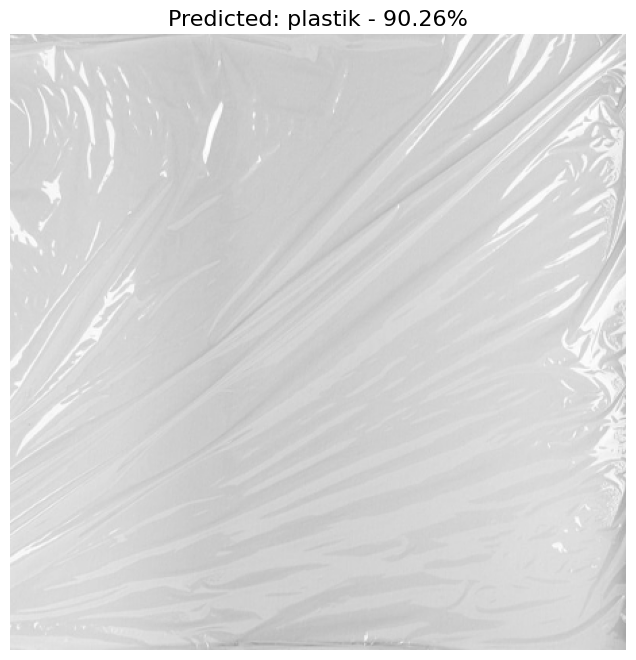

In [10]:
import cv2
import numpy as np
import requests
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB5
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Function to load an image from a URL and preprocess it
def load_image_from_url(url, img_height, img_width):
    response = requests.get(url)
    image = np.asarray(bytearray(response.content), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image_resized = cv2.resize(image, (img_height, img_width))
    image_preprocessed = preprocess_input(image_resized)  # Preprocess image for EfficientNet
    image_preprocessed = np.expand_dims(image_preprocessed, axis=0)  # Add batch dimension
    return image_preprocessed

# Function to predict the class of an image and display it
def predict_and_display(image_url):
    img_height, img_width = 456, 456  # EfficientNet's expected input dimensions

    # Load and preprocess the image
    image = load_image_from_url(image_url, img_height, img_width)

    # Predict the class of the image
    pred = model.predict(image)
    predicted_index = np.argmax(pred)
    predicted_class = classes[predicted_index]
    predicted_probability = pred[0][predicted_index]

    # Print the predicted class and the confidence of the prediction
    print(f"The predicted class is: {predicted_class}")
    print(f"Confidence: {predicted_probability:.2f}")

    # Display additional prediction probabilities for each class
    print("\nPrediction Probabilities:")
    for idx, cls in enumerate(classes):
        print(f"{cls}: {pred[0][idx] * 100:.2f}%")

    # Remove the batch dimension for displaying
    image = np.squeeze(image)

    # Display the image with the predicted label
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title(f'Predicted: {predicted_class} - {predicted_probability * 100:.2f}%', fontsize=16)
    plt.axis('off')
    plt.show()


# Define your class names
classes = ['flower', 'plastik', 'wood']

# Define the image URL
image_url = "https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L3BmLXMxMjQtdGQtNzAzNF8yLmpwZw.jpg"

# Execute the function
predict_and_display(image_url)
